# Determining Share of Polarized Submissions Using Keyword Analysis

**Using a list of keywords to determine whether a post is polarized.**

## Background

In a study by Pew Research, participates were asked to choose the keywords they associate with their political opponents from a list.

## Method

We use synonyms of the keywords determined in this list to mark certain posts as "polarized".
As a sanity check, the "share" of each of the polarizing words will be compared to that of the Pew Research study.
We will then make the analysis more detailed, in turn the polarization statistic from a nominal boolean to an ordinal *polarization index*.

In [10]:
from collect import fetch

# collect sample data from r/politics
comments = fetch()

# we only need the comment body, so we'll manually drop the other fields
for column in comments.columns:
    # delete column if it's not the body column
    if column != 'body':
        del comments[column]

print(comments.head())

                                                body
0  Plot californias retail electric price versus ...
1  1 Canada, Norway, Ireland, Sweden.\n\nI'm also...
2                                Stone, Roger Stone.
3  Your state may have Extended Benefits that go ...
4  > yet she still does\n\nIf she changed her pos...


Now that we have some sample data, we can analyze it to see whether it contains polarizing words or phrases.
We'll keep the polarized comments and filter out the rest

In [11]:
from keywords import load_polarizing_synonyms

all_keywords = load_polarizing_synonyms('../keywords')

# which comments are polarized?
polarized = comments.apply(lambda row: any(keyword.casefold() in row['body'].casefold() for keyword in all_keywords), axis=1)


# print out the polarized comments
# see if you can spot some keywords in the output!
print(comments[polarized].head())

                                                 body
1   1 Canada, Norway, Ireland, Sweden.\n\nI'm also...
3   Your state may have Extended Benefits that go ...
15  I don’t care what republicans do in their prim...
17                                             Based.
19  That's not really true.\n\nhttps://www.washing...


Now that we know which comments are polarized, we can determine how many of the comments we collected are polarized.

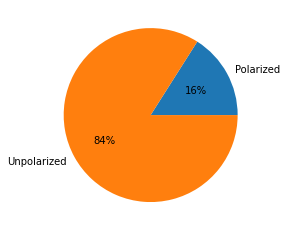

In [12]:
from matplotlib import pyplot as plt

num_polarized = len(comments[polarized])
# TODO: better word for "unpolarized"
# TODO: precision
plt.pie([num_polarized, len(comments) - num_polarized], labels=['Polarized', 'Unpolarized'], autopct='%.0f%%')
plt.show()

While this is, in itself, important information, we need to know whether this data lines up with the data reported by the Pew study so that we know whether our results make sense.

To perform this "sanity check", we must determine the makeup of the polarized posts.
We will create filter series for each individual keyword, rather than just one general `polarized` filter.


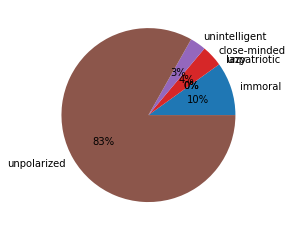

In [15]:
from keywords import load_syn, polarizing_phrases

# group the synonyms by their "root" keyword
keyword_synonyms = {keyword: [synonym for synonym in load_syn('../keywords', keyword)] for keyword in polarizing_phrases}

# create filters for each of the groupings
indices = {keyword: comments.apply(lambda row: any(synonym.casefold() in row['body'].casefold() for synonym in keyword_synonyms[keyword]), axis=1) for keyword in polarizing_phrases}

# as a sanity check, make sure that the results add up to the general result from before
# FIXME: overlap in keyword synonyms is causing this assertion to fail. Either account for or remove overlap
# assert sum(len(comments[index]) for index in indices.values()) == num_polarized

# plot each of the groupings this time
labels = polarizing_phrases + ['unpolarized'] # all the categories plus default category
# TODO: don't keep cycling colors
plt.pie([len(comments[indices[keyword]]) for keyword in polarizing_phrases] + [len(comments) - num_polarized], labels=labels, autopct='%.0f%%')
plt.show()

Since that data is valid, let's make it more legible by removing the unpolarized category and focusing solely on the polarized subcategories.

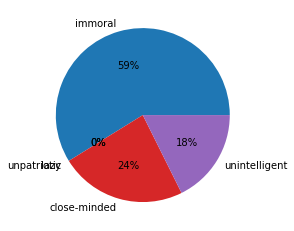

In [14]:
plt.pie([len(comments[indices[keyword]]) for keyword in polarizing_phrases], labels=polarizing_phrases, autopct='%.0f%%')
plt.show()

## Comparison and Sanity Check

Let's see how this compares to the Pew Research data

### TODO

## Polarization index

Now that we have accurate data on the share of polarization data, let's try to make the analysis more granular.
We will accomplish this by blending our nominal results into ordinal results to create a *polarization index*, which can be used to measure the polarization of a certain submission.

The polarization index is a bespoke quantifier modeled by the following equation.

$$\text{TODO}$$

TODO: explanation

TODO: implementation